In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import importlib
import random
import yaml
import torch.nn.utils.rnn as rnn_utils
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, Dataset
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, auc

import sys
sys.path.append("../../")  
import utils
importlib.reload(utils)

from utils import *
from utils_rnn import *



In [2]:
target_fpr = 0.01

In [3]:
with open("config.yaml", "r") as f:
    rnn_config = yaml.safe_load(f)

rnn_model_cfg = rnn_config["model"]

## Wikipedia (6.9B Pile-RS-Truncated)

In [4]:
seq_lens = [64, 128, 256, 512, 1024, 2048]
dataset_wiki_pythia69b = {}

for seqlen in seq_lens:
    with open(f"../../../data//pile/pile_rs_truncated/wiki/pythia6-9b_processed/pile_reservoirv2_wiki_seqlen{seqlen}_pythia-6.9b_processed.pkl", "rb") as f:
        dataset_wiki_pythia69b[seqlen] = pd.read_pickle(f)


In [5]:
dataset_wiki_pythia69b_normalised = normalize_loss_dfs(dataset_wiki_pythia69b, loss_columns)

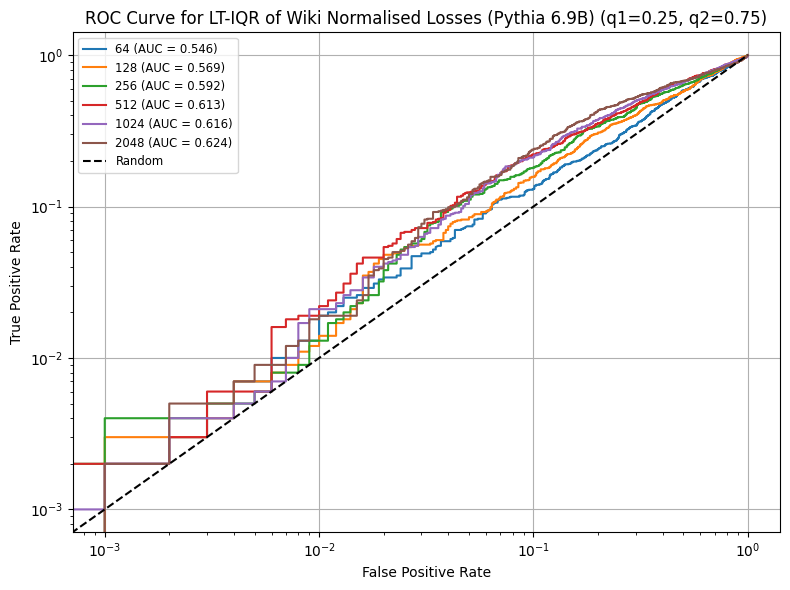

In [6]:
wiki_144_cp_aucs, wiki_144_cp_tpr = plot_roc_iqr_single_plot(dataset_wiki_pythia69b_normalised, loss_columns, "Wiki Normalised Losses (Pythia 6.9B)", target_fpr, True)

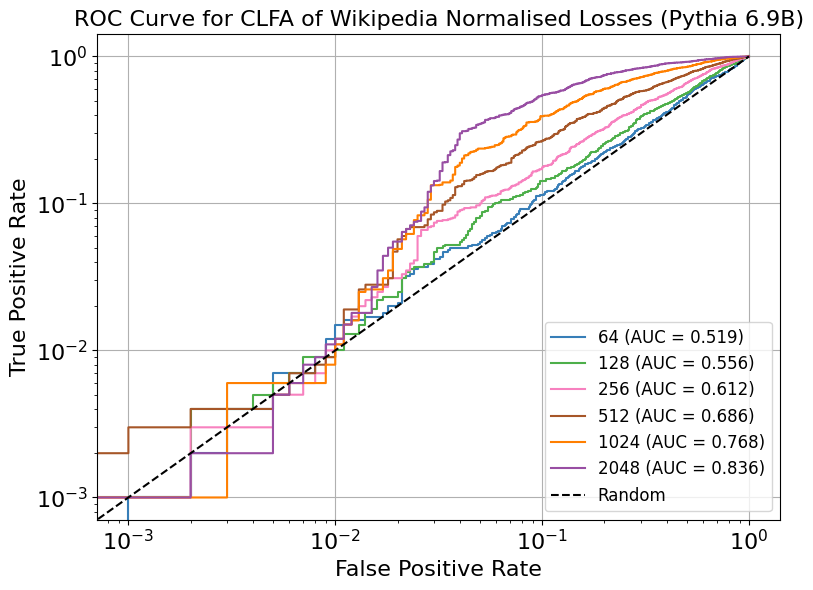

In [7]:
wiki_144_cp_clfa_aucs, wiki_144_cp_clfa_tprs = plot_clfa_normalized(dataset_wiki_pythia69b_normalised, loss_columns, "Wikipedia Normalised Losses (Pythia 6.9B)", target_fpr, True)

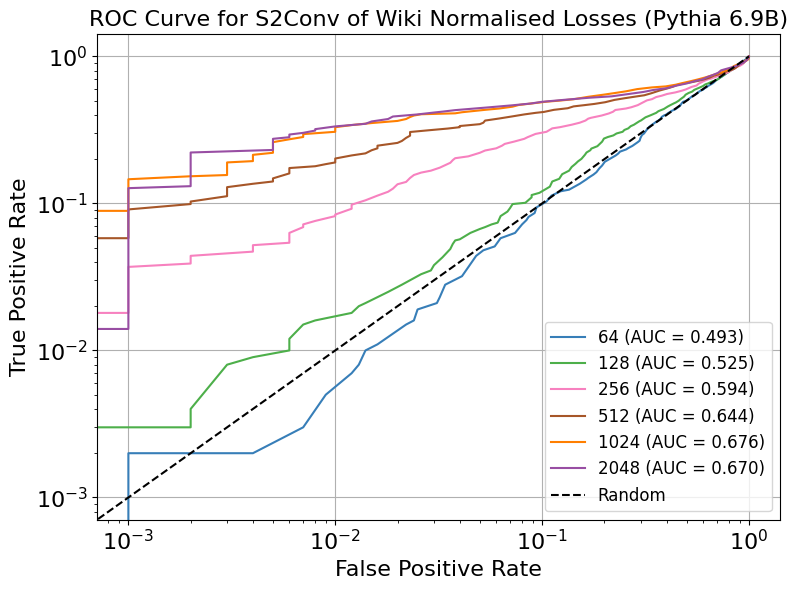

({64: np.float64(0.492555),
  128: np.float64(0.524708),
  256: np.float64(0.5935164999999999),
  512: np.float64(0.6441455),
  1024: np.float64(0.6762400000000001),
  2048: np.float64(0.6703534999999999)},
 {64: np.float64(0.005666666666666667),
  128: np.float64(0.016999999999999998),
  256: np.float64(0.084),
  512: np.float64(0.202),
  1024: np.float64(0.33),
  2048: np.float64(0.334)})

In [8]:
plot_steps_to_convergence(dataset_wiki_pythia69b_normalised, loss_columns, "Wiki Normalised Losses (Pythia 6.9B)", target_fpr, epsilon=0.05, final_fraction=0.1)

In [9]:
print(f'RNN Classifier config: {rnn_config}')
print('============================== \n\n')

for seqlen, df in dataset_wiki_pythia69b_normalised.items():
    print(f'Evaluating {seqlen}')
    df = df.copy()
    run_rnn_classifier(model_cfg = rnn_model_cfg, num_epochs=rnn_config["NUM_EPOCHS"], batch_size=rnn_config["BATCH_SIZE"], patience=rnn_config["PATIENCE"], num_folds=rnn_config["NUM_FOLDS"], df=df)
    print('================================ \n\n')


RNN Classifier config: {'NUM_EPOCHS': 50, 'BATCH_SIZE': 32, 'PATIENCE': 5, 'NUM_FOLDS': 5, 'model': {'input_size': 1, 'hidden_size': 64, 'extra_feat_dim': 2, 'rnn_type': 'GRU', 'bidirectional': False, 'dropout': 0.2, 'learning_rate': 0.001}}


Evaluating 64

🚀 Fold 1/5
Epoch 1: Train Loss = 1.1903, Val Loss = 0.7121, AUC = 0.5227
Epoch 2: Train Loss = 0.7138, Val Loss = 0.6968, AUC = 0.5226
Epoch 3: Train Loss = 0.6984, Val Loss = 0.6940, AUC = 0.5229
Epoch 4: Train Loss = 0.6969, Val Loss = 0.6918, AUC = 0.5223
Epoch 5: Train Loss = 0.6976, Val Loss = 0.6935, AUC = 0.5239
Epoch 6: Train Loss = 0.6966, Val Loss = 0.6962, AUC = 0.5278
Epoch 7: Train Loss = 0.6956, Val Loss = 0.6920, AUC = 0.5235
Epoch 8: Train Loss = 0.6948, Val Loss = 0.6922, AUC = 0.5245
Epoch 9: Train Loss = 0.6947, Val Loss = 0.6944, AUC = 0.5269
⏹️ Early stopping at epoch 9
🧪 Fold 1 Test Loss = 0.6961, Test AUC = 0.4872

🚀 Fold 2/5
Epoch 1: Train Loss = 1.1691, Val Loss = 0.7034, AUC = 0.5441
Epoch 2: Train Loss = 

## PubMed Central 6.9B (Pile-RS-Truncated)

In [10]:
seq_lens = [64, 128, 256, 512, 1024, 2048]
dataset_pubmedc_pythia69b = {}

for seqlen in seq_lens:
    with open(f"../../../data/pile/pile_rs_truncated/pubmedc/pythia6-9b_processed/pile_reservoirv2_pubmedc_seqlen{seqlen}_pythia-6.9b_processed.pkl", "rb") as f:
        dataset_pubmedc_pythia69b[seqlen] = pd.read_pickle(f)


In [11]:
dataset_pubmedc_pythia69b_normalised = normalize_loss_dfs(dataset_pubmedc_pythia69b, loss_columns)

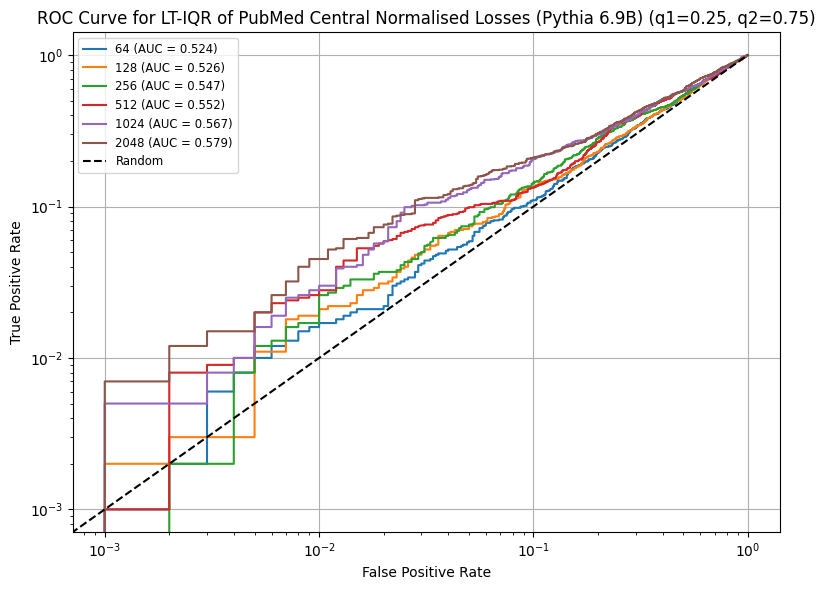

In [12]:
pubmedc_144_cp_norm_aucs, pubmedc_144_cp_norm_tpr = plot_roc_iqr_single_plot(dataset_pubmedc_pythia69b_normalised, loss_columns, "PubMed Central Normalised Losses (Pythia 6.9B)", target_fpr, True)


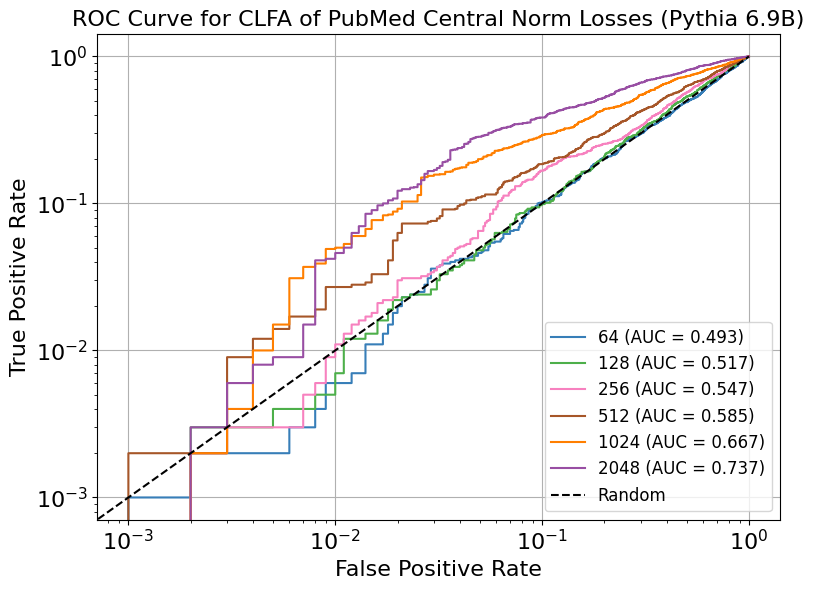

In [13]:
pubmedc_144_cp_norm_clfa_aucs, pubmedc_144_cp_norm_clfa_tprs = plot_clfa_normalized(dataset_pubmedc_pythia69b_normalised, loss_columns, "PubMed Central Norm Losses (Pythia 6.9B)", target_fpr, True)

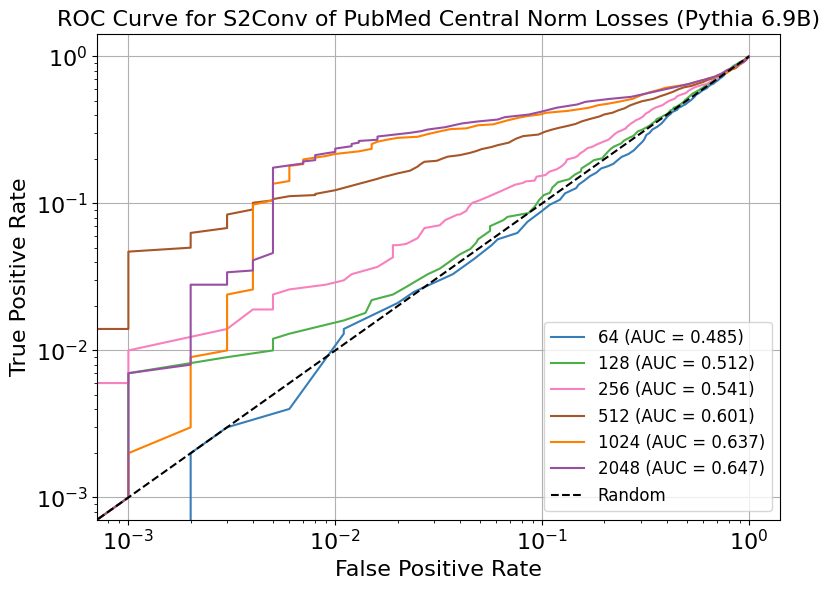

In [14]:
pubmedc_144_cp_norm_s2conv_aucs, pubmedc_144_cp_norm_s2conv_tprs = plot_steps_to_convergence(dataset_pubmedc_pythia69b_normalised, loss_columns, "PubMed Central Norm Losses (Pythia 6.9B)", target_fpr)

In [ ]:
print(f'RNN Classifier config: {rnn_config}')
print('============================== \n\n')

for seqlen, df in dataset_pubmedc_pythia69b_normalised.items():
    print(f'Evaluating {seqlen}')
    df = df.copy()
    run_rnn_classifier(model_cfg = rnn_model_cfg, num_epochs=rnn_config["NUM_EPOCHS"], batch_size=rnn_config["BATCH_SIZE"], patience=rnn_config["PATIENCE"], num_folds=rnn_config["NUM_FOLDS"], df=df)
    print('================================ \n\n')


## USPTO 6.9B (Pile-RS-Truncated)

In [ ]:
seq_lens = [64, 128, 256, 512, 1024, 2048]
dataset_uspto_pythia69b = {}

for seqlen in seq_lens:
    with open(f"../../../data/pile/pile_rs_truncated/uspto/pythia6-9b_processed/pile_reservoirv2_uspto_seqlen{seqlen}_pythia-6.9b_processed.pkl", "rb") as f:
        dataset_uspto_pythia69b[seqlen] = pd.read_pickle(f)


In [ ]:
dataset_uspto_pythia69b_normalised = normalize_loss_dfs(dataset_uspto_pythia69b, loss_columns)

In [ ]:
uspto_144_cp_norm_aucs, uspto_144_cp_norm_tpr = plot_roc_iqr_single_plot(dataset_uspto_pythia69b_normalised, loss_columns, "USPTO Norm Losses (Pythia 6.9B)", target_fpr, True)

In [ ]:
uspto_144_cp_norm_clfa_aucs, uspto_144_cp_norm_clfa_tprs = plot_clfa_normalized(dataset_uspto_pythia69b_normalised, loss_columns, "USPTO Norm Losses (Pythia 6.9B)", target_fpr, True)

In [ ]:
uspto_144_cp_norm_s2conv_aucs, uspto_144_cp_norm_s2conv_tprs = plot_steps_to_convergence(dataset_uspto_pythia69b_normalised, loss_columns, "USPTO Norm Losses (Pythia 6.9B)", target_fpr )

In [ ]:
print(f'RNN Classifier config: {rnn_config}')
print('============================== \n\n')

for seqlen, df in dataset_uspto_pythia69b_normalised.items():
    print(f'Evaluating {seqlen}')
    df = df.copy()
    run_rnn_classifier(model_cfg = rnn_model_cfg, num_epochs=rnn_config["NUM_EPOCHS"], batch_size=rnn_config["BATCH_SIZE"], patience=rnn_config["PATIENCE"], num_folds=rnn_config["NUM_FOLDS"], df=df)
    print('================================ \n\n')


## Pile-CC 6.9B (Pile-RS-Truncated)

In [15]:
seq_lens = [64, 128, 256, 512, 1024, 2048]
dataset_pilecc_pythia69b = {}

for seqlen in seq_lens:
    with open(f"../../../data/pile/pile_rs_truncated/pilecc/pythia6-9b_processed/pile_reservoirv2_pilecc_seqlen{seqlen}_pythia-6.9b_processed.pkl", "rb") as f:
        dataset_pilecc_pythia69b[seqlen] = pd.read_pickle(f)


In [16]:
dataset_pilecc_pythia69b_normalised = normalize_loss_dfs(dataset_pilecc_pythia69b, loss_columns)

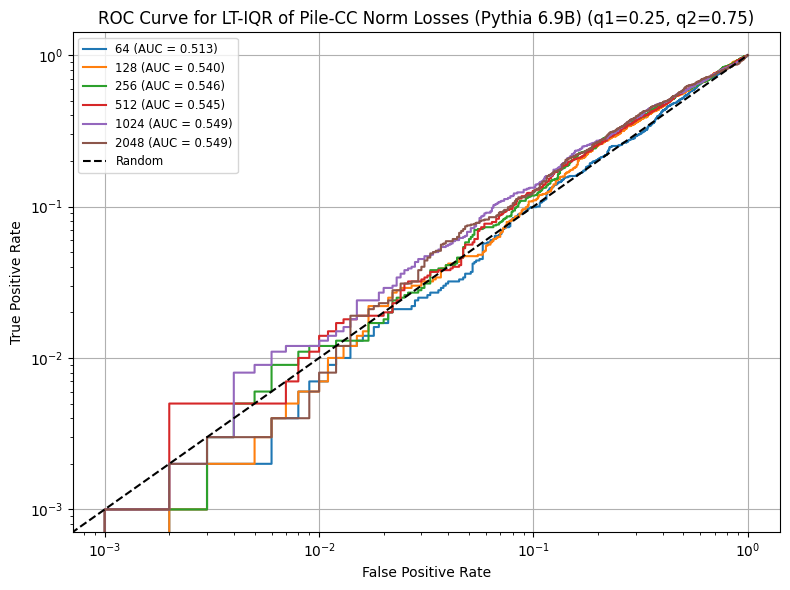

In [17]:
pilecc_144_cp_norm_aucs, pilecc_144_cp_norm_tpr = plot_roc_iqr_single_plot(dataset_pilecc_pythia69b_normalised, loss_columns, "Pile-CC Norm Losses (Pythia 6.9B)",target_fpr, True)

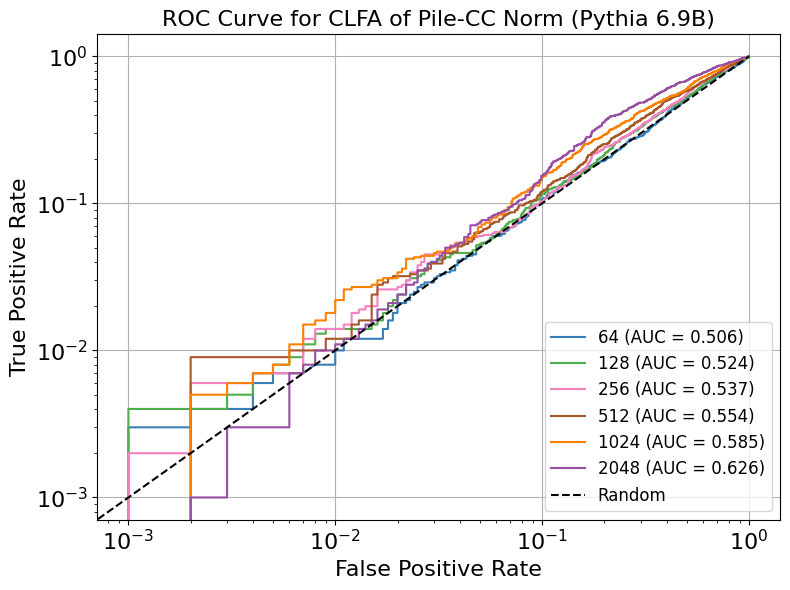

In [18]:
pilecc_144_cp_norm_clfa_aucs, pilecc_144_cp_norm_clfa_tprs = plot_clfa_normalized(dataset_pilecc_pythia69b_normalised, loss_columns, "Pile-CC Norm (Pythia 6.9B)", target_fpr, True)

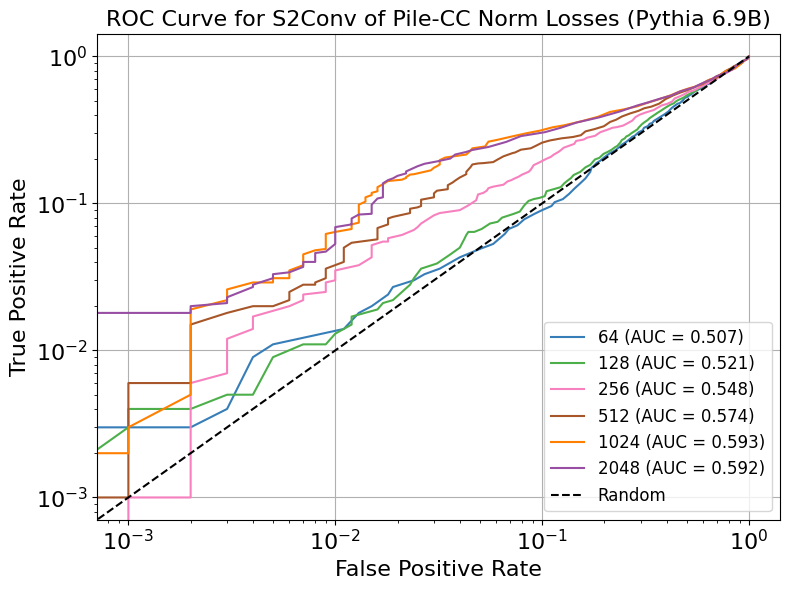

In [19]:
pilecc_144_cp_norm_s2conv_aucs, pilecc_144_cp_norm_s2conv_tprs = plot_steps_to_convergence(dataset_pilecc_pythia69b_normalised, loss_columns, "Pile-CC Norm Losses (Pythia 6.9B)", target_fpr )

In [ ]:
print(f'RNN Classifier config: {rnn_config}')
print('============================== \n\n')

for seqlen, df in dataset_pilecc_pythia69b_normalised.items():
    print(f'Evaluating {seqlen}')
    df = df.copy()
    run_rnn_classifier(model_cfg = rnn_model_cfg, num_epochs=rnn_config["NUM_EPOCHS"], batch_size=rnn_config["BATCH_SIZE"], patience=rnn_config["PATIENCE"], num_folds=rnn_config["NUM_FOLDS"], df=df)
    print('================================ \n\n')


## Github 6.9B (Pile-RS-Truncated)

In [20]:
seq_lens = [64, 128, 256, 512, 1024, 2048]
dataset_github_pythia69b = {}

for seqlen in seq_lens:
    with open(f"../../../data/pile/pile_rs_truncated/github/pythia6-9b_processed/pile_reservoirv2_github_seqlen{seqlen}_pythia-6.9b_processed.pkl", "rb") as f:
        dataset_github_pythia69b[seqlen] = pd.read_pickle(f)


In [21]:
dataset_github_pythia69b_normalised = normalize_loss_dfs(dataset_github_pythia69b, loss_columns)

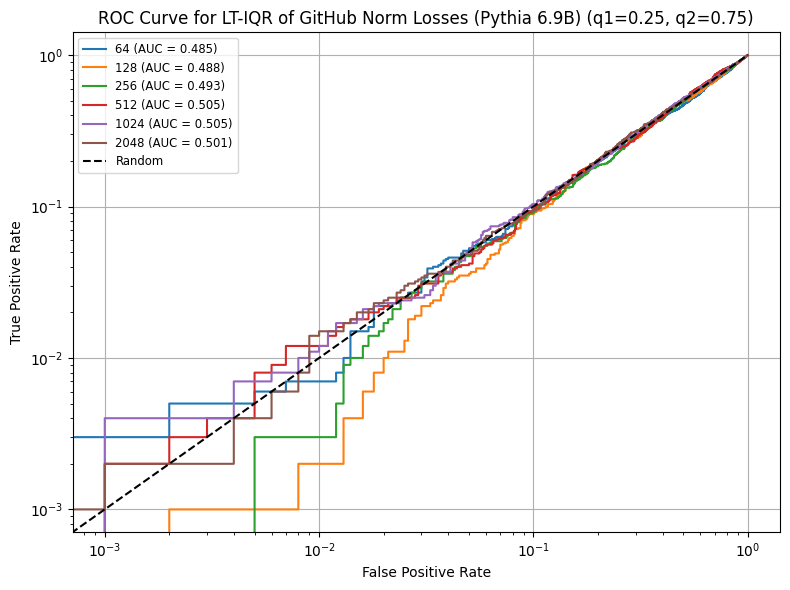

In [22]:
github_144_cp_norm_aucs, github_144_cp_norm_tpr = plot_roc_iqr_single_plot(dataset_github_pythia69b_normalised, loss_columns, "GitHub Norm Losses (Pythia 6.9B)", target_fpr, True)

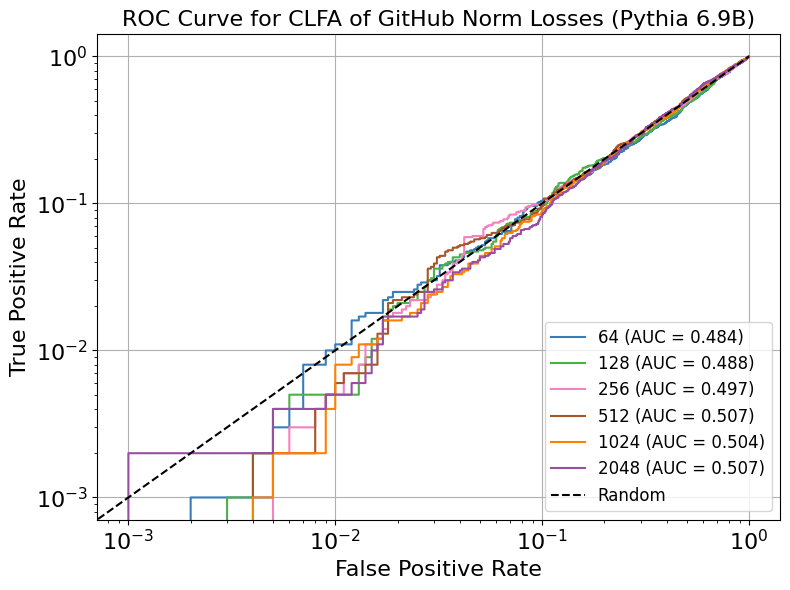

In [23]:
github_144_cp_norm_clfa_aucs, github_144_cp_norm_clfa_tprs = plot_clfa_normalized(dataset_github_pythia69b_normalised, loss_columns, "GitHub Norm Losses (Pythia 6.9B)", target_fpr, True)

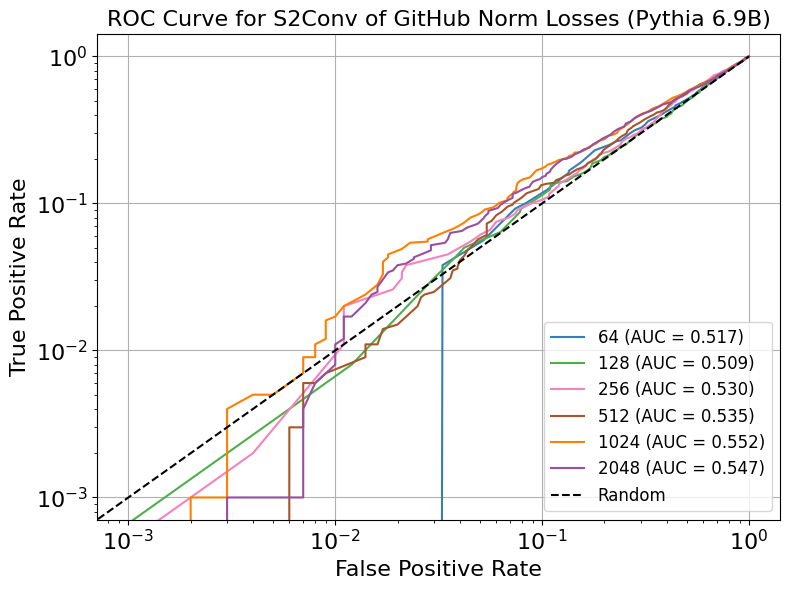

In [24]:
github_144_cp_norm_s2conv_aucs, github_144_cp_norm_s2conv_tprs = plot_steps_to_convergence(dataset_github_pythia69b_normalised, loss_columns, "GitHub Norm Losses (Pythia 6.9B)", target_fpr )

In [ ]:
print(f'RNN Classifier config: {rnn_config}')
print('============================== \n\n')

for seqlen, df in dataset_github_pythia69b_normalised.items():
    print(f'Evaluating {seqlen}')
    df = df.copy()
    run_rnn_classifier(model_cfg = rnn_model_cfg, num_epochs=rnn_config["NUM_EPOCHS"], batch_size=rnn_config["BATCH_SIZE"], patience=rnn_config["PATIENCE"], num_folds=rnn_config["NUM_FOLDS"], df=df)
    print('================================ \n\n')
